In [3]:
import h5py
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [4]:
# reading data
DATA = Path('data')
h5 = h5py.File(DATA/'train.h5', 'r')

n = 10000
n_train = int(0.8*n)

train_x = h5['x0'][:n_train]
train_y = h5['targs'][:n_train]
valid_x = h5['x0'][n_train:n]
valid_y = h5['targs'][n_train:n]
h5.close()

In [5]:
train_x.shape

(8000, 10, 10, 10)

In [6]:
# need to normalize dataset
print('train data min: ' + str(np.min(train_x)))
print('train data max: ' + str(np.max(train_x)))

train data min: 0.0008850734
train data max: 42.610626


  0%|          | 0/10 [00:00<?, ?it/s]

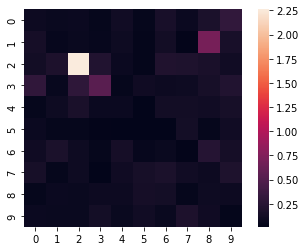

 10%|█         | 1/10 [00:00<00:03,  2.94it/s]

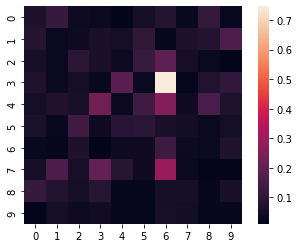

 20%|██        | 2/10 [00:00<00:02,  3.91it/s]

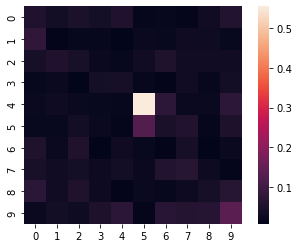

 30%|███       | 3/10 [00:00<00:02,  3.25it/s]

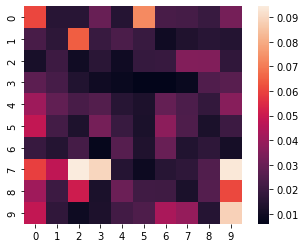

 40%|████      | 4/10 [00:01<00:01,  3.96it/s]

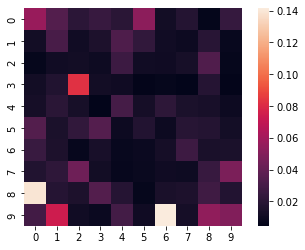

 50%|█████     | 5/10 [00:01<00:01,  4.56it/s]

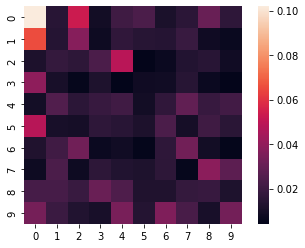

 60%|██████    | 6/10 [00:01<00:00,  5.10it/s]

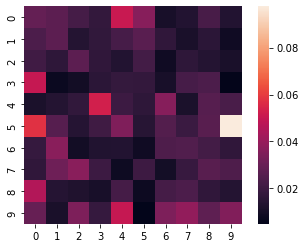

 70%|███████   | 7/10 [00:01<00:00,  5.48it/s]

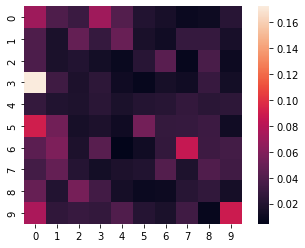

 80%|████████  | 8/10 [00:01<00:00,  5.64it/s]

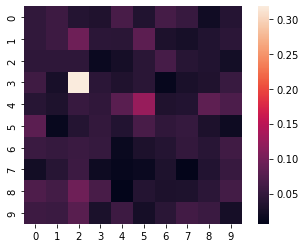

 90%|█████████ | 9/10 [00:01<00:00,  5.58it/s]

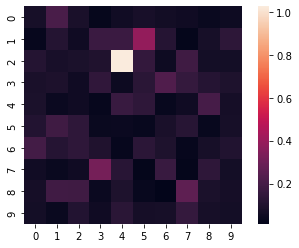

100%|██████████| 10/10 [00:02<00:00,  4.85it/s]


In [7]:
# all 10 layers for the first training dataset X0 sample.
for i in tqdm(range(len(train_x[0]))):
    sns.heatmap(train_x[0][i], square=True)
    plt.show()

In [8]:
# normalize data
data = [train_x, train_y, valid_x, valid_y]
for i, x in enumerate(data):
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)

    data[i] = (x - x_min)/(x_max-x_min)
    data[i][np.isnan(data[i])] = 0

train_x, train_y, valid_x, valid_y = data

/opt/anaconda3/envs/env_pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


  0%|          | 0/10 [00:00<?, ?it/s]

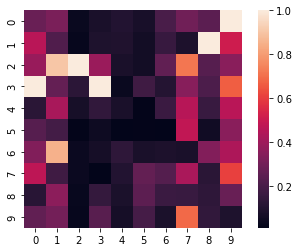

 10%|█         | 1/10 [00:00<00:01,  4.86it/s]

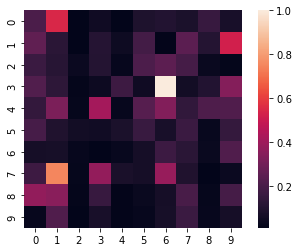

 20%|██        | 2/10 [00:00<00:01,  5.63it/s]

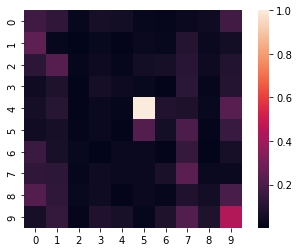

 30%|███       | 3/10 [00:00<00:01,  5.95it/s]

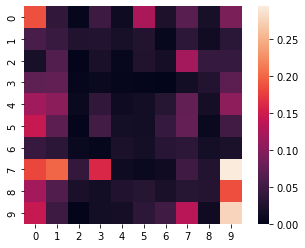

 40%|████      | 4/10 [00:00<00:01,  4.95it/s]

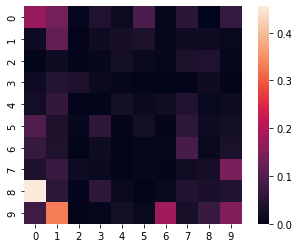

 50%|█████     | 5/10 [00:00<00:00,  5.07it/s]

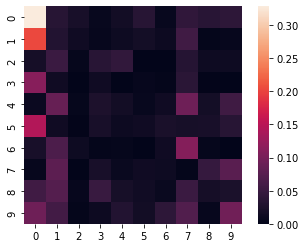

 60%|██████    | 6/10 [00:01<00:00,  4.67it/s]

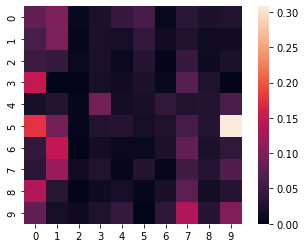

 70%|███████   | 7/10 [00:01<00:00,  4.92it/s]

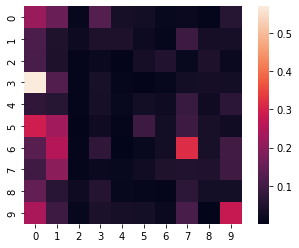

 80%|████████  | 8/10 [00:01<00:00,  5.34it/s]

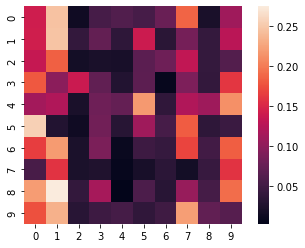

 90%|█████████ | 9/10 [00:01<00:00,  5.65it/s]

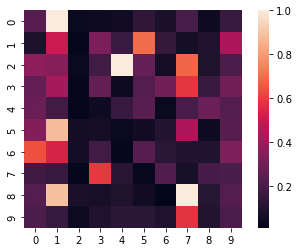

100%|██████████| 10/10 [00:01<00:00,  5.39it/s]


In [9]:
for i in tqdm(range(len(train_x[0]))):
    sns.heatmap(train_x[0][i], square=True)
    plt.show()

In [10]:
print('train data min: ' + str(np.min(train_x)))
print('train data max: ' + str(np.max(train_x)))

train data min: 0.0
train data max: 1.0


  0%|          | 0/10 [00:00<?, ?it/s]

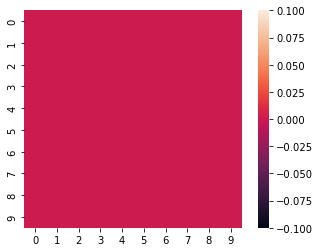

 10%|█         | 1/10 [00:00<00:01,  4.95it/s]

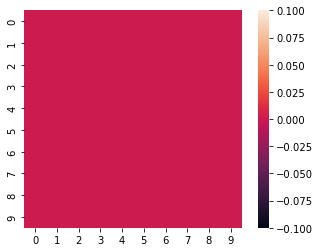

 20%|██        | 2/10 [00:00<00:01,  5.50it/s]

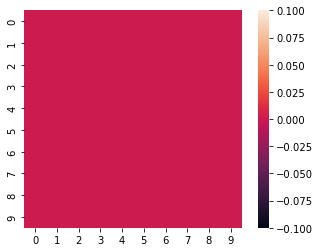

 30%|███       | 3/10 [00:00<00:01,  5.52it/s]

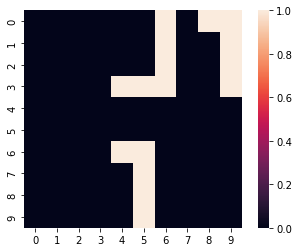

 40%|████      | 4/10 [00:00<00:01,  4.92it/s]

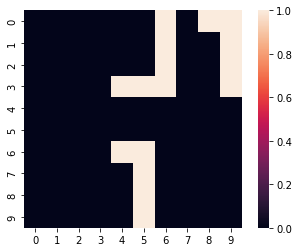

 50%|█████     | 5/10 [00:01<00:01,  4.19it/s]

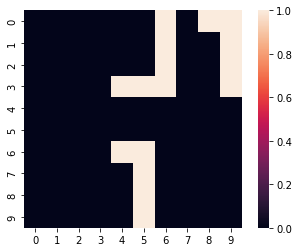

 60%|██████    | 6/10 [00:01<00:00,  4.68it/s]

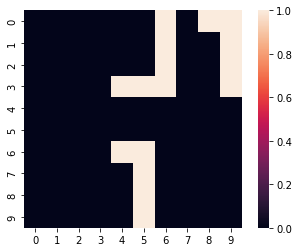

 70%|███████   | 7/10 [00:01<00:00,  4.94it/s]

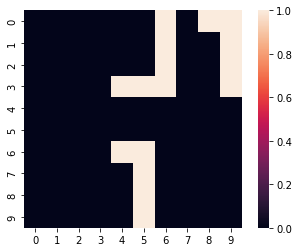

 80%|████████  | 8/10 [00:01<00:00,  4.80it/s]

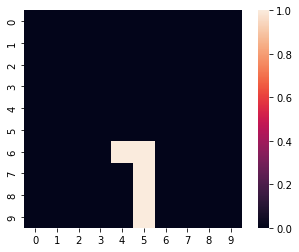

 90%|█████████ | 9/10 [00:01<00:00,  5.14it/s]

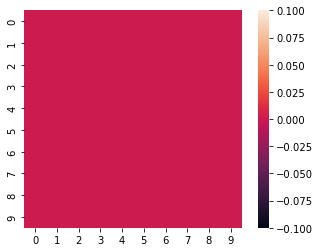

100%|██████████| 10/10 [00:02<00:00,  4.99it/s]


In [11]:
for i in tqdm(range(len(train_y[0]))):
    sns.heatmap(train_y[0][i], square=True)
    plt.show()

In [12]:
# change train_y to be the number of walls
train_y = [(x == 1).sum() for x in train_y]
(np.min(train_y), np.max(train_y))

(4, 234)

In [13]:
import torch
train_x = torch.from_numpy(np.array(train_x))
train_y = torch.from_numpy(np.array(train_y))
valid_x = torch.from_numpy(np.array(valid_x))
valid_y = torch.from_numpy(np.array(valid_y))

/opt/anaconda3/envs/env_pytorch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
import torch.nn as nn

class DNN(nn.Module):
    def __init__(self, num_classes=1000):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1000, 784),
            nn.ReLU(),
            nn.Linear(784, 784),
            nn.ReLU(),
            nn.Linear(784, num_classes)
        )

    def forward(self, x):
        return self.model(x)

In [28]:
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from random import shuffle

In [29]:
model = DNN()
print('DNN model initialized...')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device: ' + str(device))

loss_func = nn.CrossEntropyLoss()
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)

num_epochs = 10
batch_size = 64
print('Parameters initialized...')

train_loader = torch.utils.data.DataLoader([[train_x[i], train_y[i]] for i in range(len(train_x) - 1)], shuffle=True, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader([[valid_x[i], valid_y[i]] for i in range(len(valid_x) - 1)], shuffle=True, batch_size=batch_size)
print('Data loaders initialized...')

DNN model initialized...
Device: cpu
Parameters initialized...
Data loaders initialized...


In [30]:
losses=[]
model.train()
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader, 0):
        slices, labels = data

        optimizer.zero_grad()

        predictions = model(slices)
        loss = loss_func(predictions, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))
        
print('Finished Training')

Epoch [1/10], Step [100/125], Loss: 4.8775
Epoch [2/10], Step [100/125], Loss: 4.8020
Epoch [3/10], Step [100/125], Loss: 4.5047
Epoch [4/10], Step [100/125], Loss: 4.5846
Epoch [5/10], Step [100/125], Loss: 4.7604
Epoch [6/10], Step [100/125], Loss: 4.3654
Epoch [7/10], Step [100/125], Loss: 4.4381
Epoch [8/10], Step [100/125], Loss: 4.1838
Epoch [9/10], Step [100/125], Loss: 3.7279
Epoch [10/10], Step [100/125], Loss: 3.4127
Finished Training


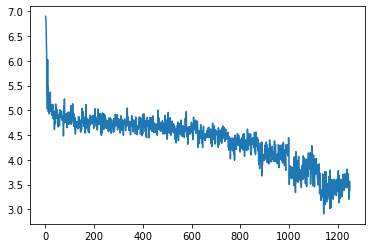

In [31]:
plt.plot(losses)